#Importación de librerías

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import random
from scipy.optimize import fmin

#Primer punto

Genere un data frame de pandas y agregé una nueva columna de IPMH con una incertidubre del 2% aleatoria. Es decir, a cada IPMH sumarle o restarle un número aleatoria en el rango de su 2%

#Creación del Dataframe

In [ ]:
original = [{'día':1,'IPMH':464},
            {'día':2,'IPMH':494},
            {'día':3,'IPMH':532},
            {'día':4,'IPMH':552},
            {'día':5,'IPMH':576},
            {'día':6,'IPMH':589}]

data = {'día':[], 'IPMH':[]}

for i in original:
  data['día'].append(i['día'])
  data['IPMH'].append(i['IPMH'])

data = pd.DataFrame(data)
data

,día,IPMH
0,1,464
1,2,494
2,3,532
3,4,552
4,5,576
5,6,589


#Asignación de la incertidumbre del 2 por mil a cada dato

In [ ]:
data['IPMH2'] = [round(i + i*random.uniform(-0.002,0.002),2) for i in data['IPMH']]
data

,día,IPMH,IPMH2
0,1,464,463.88
1,2,494,493.92
2,3,532,532.85
3,4,552,551.12
4,5,576,575.80
5,6,589,590.15


#Definición de la ecuación de movimiento

In [143]:
def coeff (x = data['día'], y = data['IPMH2'], n = 2):
  fit = np.polyfit(x,y,n)
  x0,y0,a = fit
  return x0,y0,a

def free_IPMH_fall (t,func=coeff()):
  """
  Determinación de la propagación de la infección a partir de un modelo de caida libre, donde:
  
    x0 = El numero inicial de IPMH 
    v0 = La velocidad inicial de IPMH en IPMH/día
    a = La aceleración constante en IPMH/día**2
    t = día en el cual se estima la medida

  """  
  x0,y0,a = func
  return x0 + y0*t + (0.5*a)*(t**2)

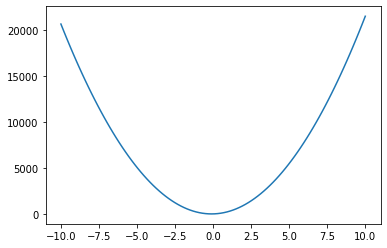

In [ ]:
span = np.linspace(-10,10,100)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(span, [free_IPMH_fall(i) for i in span])

#Obtención del maximo de infecciones y el día pico

In [ ]:
día_pico = fmin(free_IPMH_fall, 0)

Optimization terminated successfully.
         Current function value: -4.557245
         Iterations: 18
         Function evaluations: 36


por lo tanto se observa que el pico maximo se dió hace unos 5 días aproximadamente 

In [ ]:
max_infections = free_IPMH_fall(-4.718211)

In [ ]:
print(f"El maximo numero de infecciones se dió hace unos 5 días y fue de {max_infections:.0f} infecciones por millón")

El maximo numero de infecciones se dió hace unos 5 días y fue de 4392 infecciones por millón


#Valores de velocidad y aceleración

In [141]:
print(f"Los valores de velocidad inicial y aceleración inicial son de {coeff()[1]:.0f} y {coeff()[2]:.0f} respectivamente")

Los valores de velocidad inicial y aceleración inicial son de 43 y 423 respectivamente
